Ifollow the CRISP-DM process for this notebook which are: Business understanding, Data understanding, Data preparation, Modeling, Evaluation, Deployment. understanding the business and the data that been used is crucial.To have bright insight for business we should have a good understating about features in each datasets. Using raw dataset at first point and then data preprocessing such as data cleansing and data wrangling should be done before statistical analysis and data visualization. I selected one of the famous opened datasets in the internet which is Airbnb dataset. I selected Seattle Airbnb for data analysis to answer three questions:

Q1. what is the range of Most common listing price for AirBnb?
Q2. What is the realtionship between property_type and prcie?
Q3. what is the most expensive neiborhood?


In [76]:
pwd

'C:\\Users\\18588'

In [57]:
# Importing data and libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MultiLabelBinarizer 
%matplotlib inline

In [59]:
#for understand data, i loaded csv file to dataframe for data exploration. three files are related to Seathle Air bnb
listing_df = pd.read_csv('listings.csv')
calendar_df = pd.read_csv('calendar.csv')
reviews_df = pd.read_csv('reviews.csv')

In [61]:
#undestaing about the features in calendar_df:
calendar_df.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [67]:
listing_df.shape   #head()

(3818, 92)

In [66]:
listing_df.amenities    #columns

0       {TV,"Cable TV",Internet,"Wireless Internet","A...
1       {TV,Internet,"Wireless Internet",Kitchen,"Free...
2       {TV,"Cable TV",Internet,"Wireless Internet","A...
3       {Internet,"Wireless Internet",Kitchen,"Indoor ...
4       {TV,"Cable TV",Internet,"Wireless Internet",Ki...
                              ...                        
3813    {TV,"Cable TV",Internet,"Wireless Internet","A...
3814    {TV,"Cable TV",Internet,"Wireless Internet",Ki...
3815    {"Cable TV","Wireless Internet",Kitchen,"Free ...
3816    {TV,"Wireless Internet",Kitchen,"Free Parking ...
3817    {TV,"Cable TV",Internet,"Wireless Internet",Ki...
Name: amenities, Length: 3818, dtype: object

In [9]:
listing_df['host_location'].value_counts()

Seattle, Washington, United States                3259
US                                                 246
Spokane, Washington, United States                  41
Kent, Washington, United States                     34
Los Angeles, California, United States              13
                                                  ... 
Oakland, California, United States                   1
Minneapolis, Minnesota, United States                1
Grand Rapids, Michigan, United States                1
Seattle WA and Portland OR                           1
All over the Planet. I'm having a Maui Moment.       1
Name: host_location, Length: 120, dtype: int64

In [10]:
listing_df['amenities'].value_counts()


{}                                                                                                                                                                                                                                                                                                      45
{Internet,"Wireless Internet",Kitchen,"Free Parking on Premises",Heating,Washer,Dryer}                                                                                                                                                                                                                  11
{TV,"Cable TV",Internet,"Wireless Internet",Pool,Kitchen,"Free Parking on Premises",Gym,"Elevator in Building","Hot Tub",Heating,"Family/Kid Friendly",Washer,Dryer,"Smoke Detector","Carbon Monoxide Detector","Fire Extinguisher",Essentials,Shampoo,"24-Hour Check-in",Hangers,"Hair Dryer",Iron}    10
{TV,"Cable TV",Internet,"Wireless Internet",Kitchen,"Buzzer/Wireless Intercom",Heating,Washer,Dryer,Ess

In [11]:
neighbourhood_cols = ['id', 'property_type', 'room_type', 'neighbourhood', 
                      'neighbourhood_cleansed','zipcode', 'price']

In [68]:
neighbourhood_listings = listing_df[neighbourhood_cols]
neighbourhood_listings.shape  #head()

(3818, 7)

In [13]:
neighbourhood_listings.tail()

,id,property_type,room_type,neighbourhood,neighbourhood_cleansed,zipcode,price
3813,8101950,House,Entire home/apt,Fremont,Fremont,98107,$359.00
3814,8902327,Apartment,Entire home/apt,Portage Bay,Portage Bay,98102,$79.00
3815,10267360,House,Entire home/apt,NaN,Rainier Beach,98178,$93.00
3816,9604740,Condominium,Entire home/apt,NaN,Madison Park,98112,$99.00
3817,10208623,Apartment,Entire home/apt,Queen Anne,East Queen Anne,98109,$87.00


Q1.what is the range of Most common listing price for AirBnb?

In [69]:
#in data modeling and data analys we need the numeric type for features:
listing_df['price'] = listing_df['price'].apply(lambda x: x.replace('$','').replace(',', '').replace('.00', '')).astype(np.float64)
listing_df['price'].head()

0     85.0
1    150.0
2    975.0
3    100.0
4    450.0
Name: price, dtype: float64

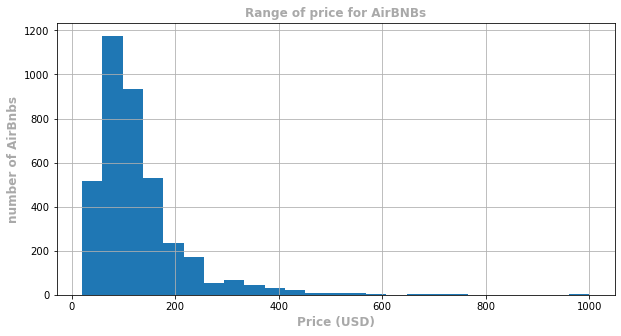

In [56]:
#data visualization: histogeram is work perfectly for this case.
plt.figure(figsize=(10, 5));
listing_df['price'].hist(bins = 25);
plt.title('Range of price for AirBNBs', size = 12, weight = 'bold', color='darkgrey');
plt.ylabel('number of AirBnbs', weight = 'bold', size = 12, color='darkgrey');
plt.xlabel('Price (USD)', weight = 'bold', size= 12, color='darkgrey');

Based on above histogram most of the listings price are in range of maximum 180 dollars.

Q2. What is the realtionship between property_type and prcie?

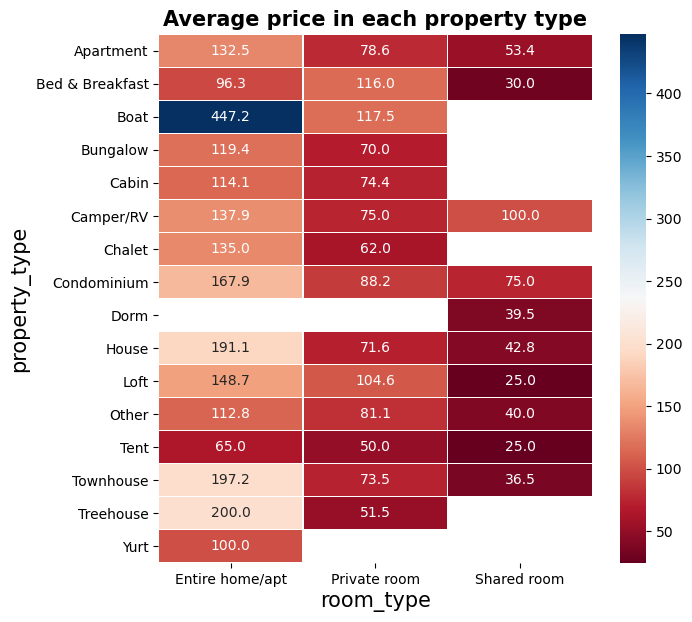

In [75]:
plt.figure(figsize=(7,7), dpi=100)
plt.title('Average price in each property type', weight ='bold', size = 15);
plt.xlabel('room_type', size = 15)
plt.ylabel('property_type', size = 15)
sns.heatmap(listing_df.groupby(['property_type','room_type']).price.mean().unstack(), annot=True, fmt='.1f', linewidths= .25, cmap='RdBu')

based on the above graph the most expensive property type is Entire home/apt and the least price is shared room.

Q3. what is the most expensive neiborhood?

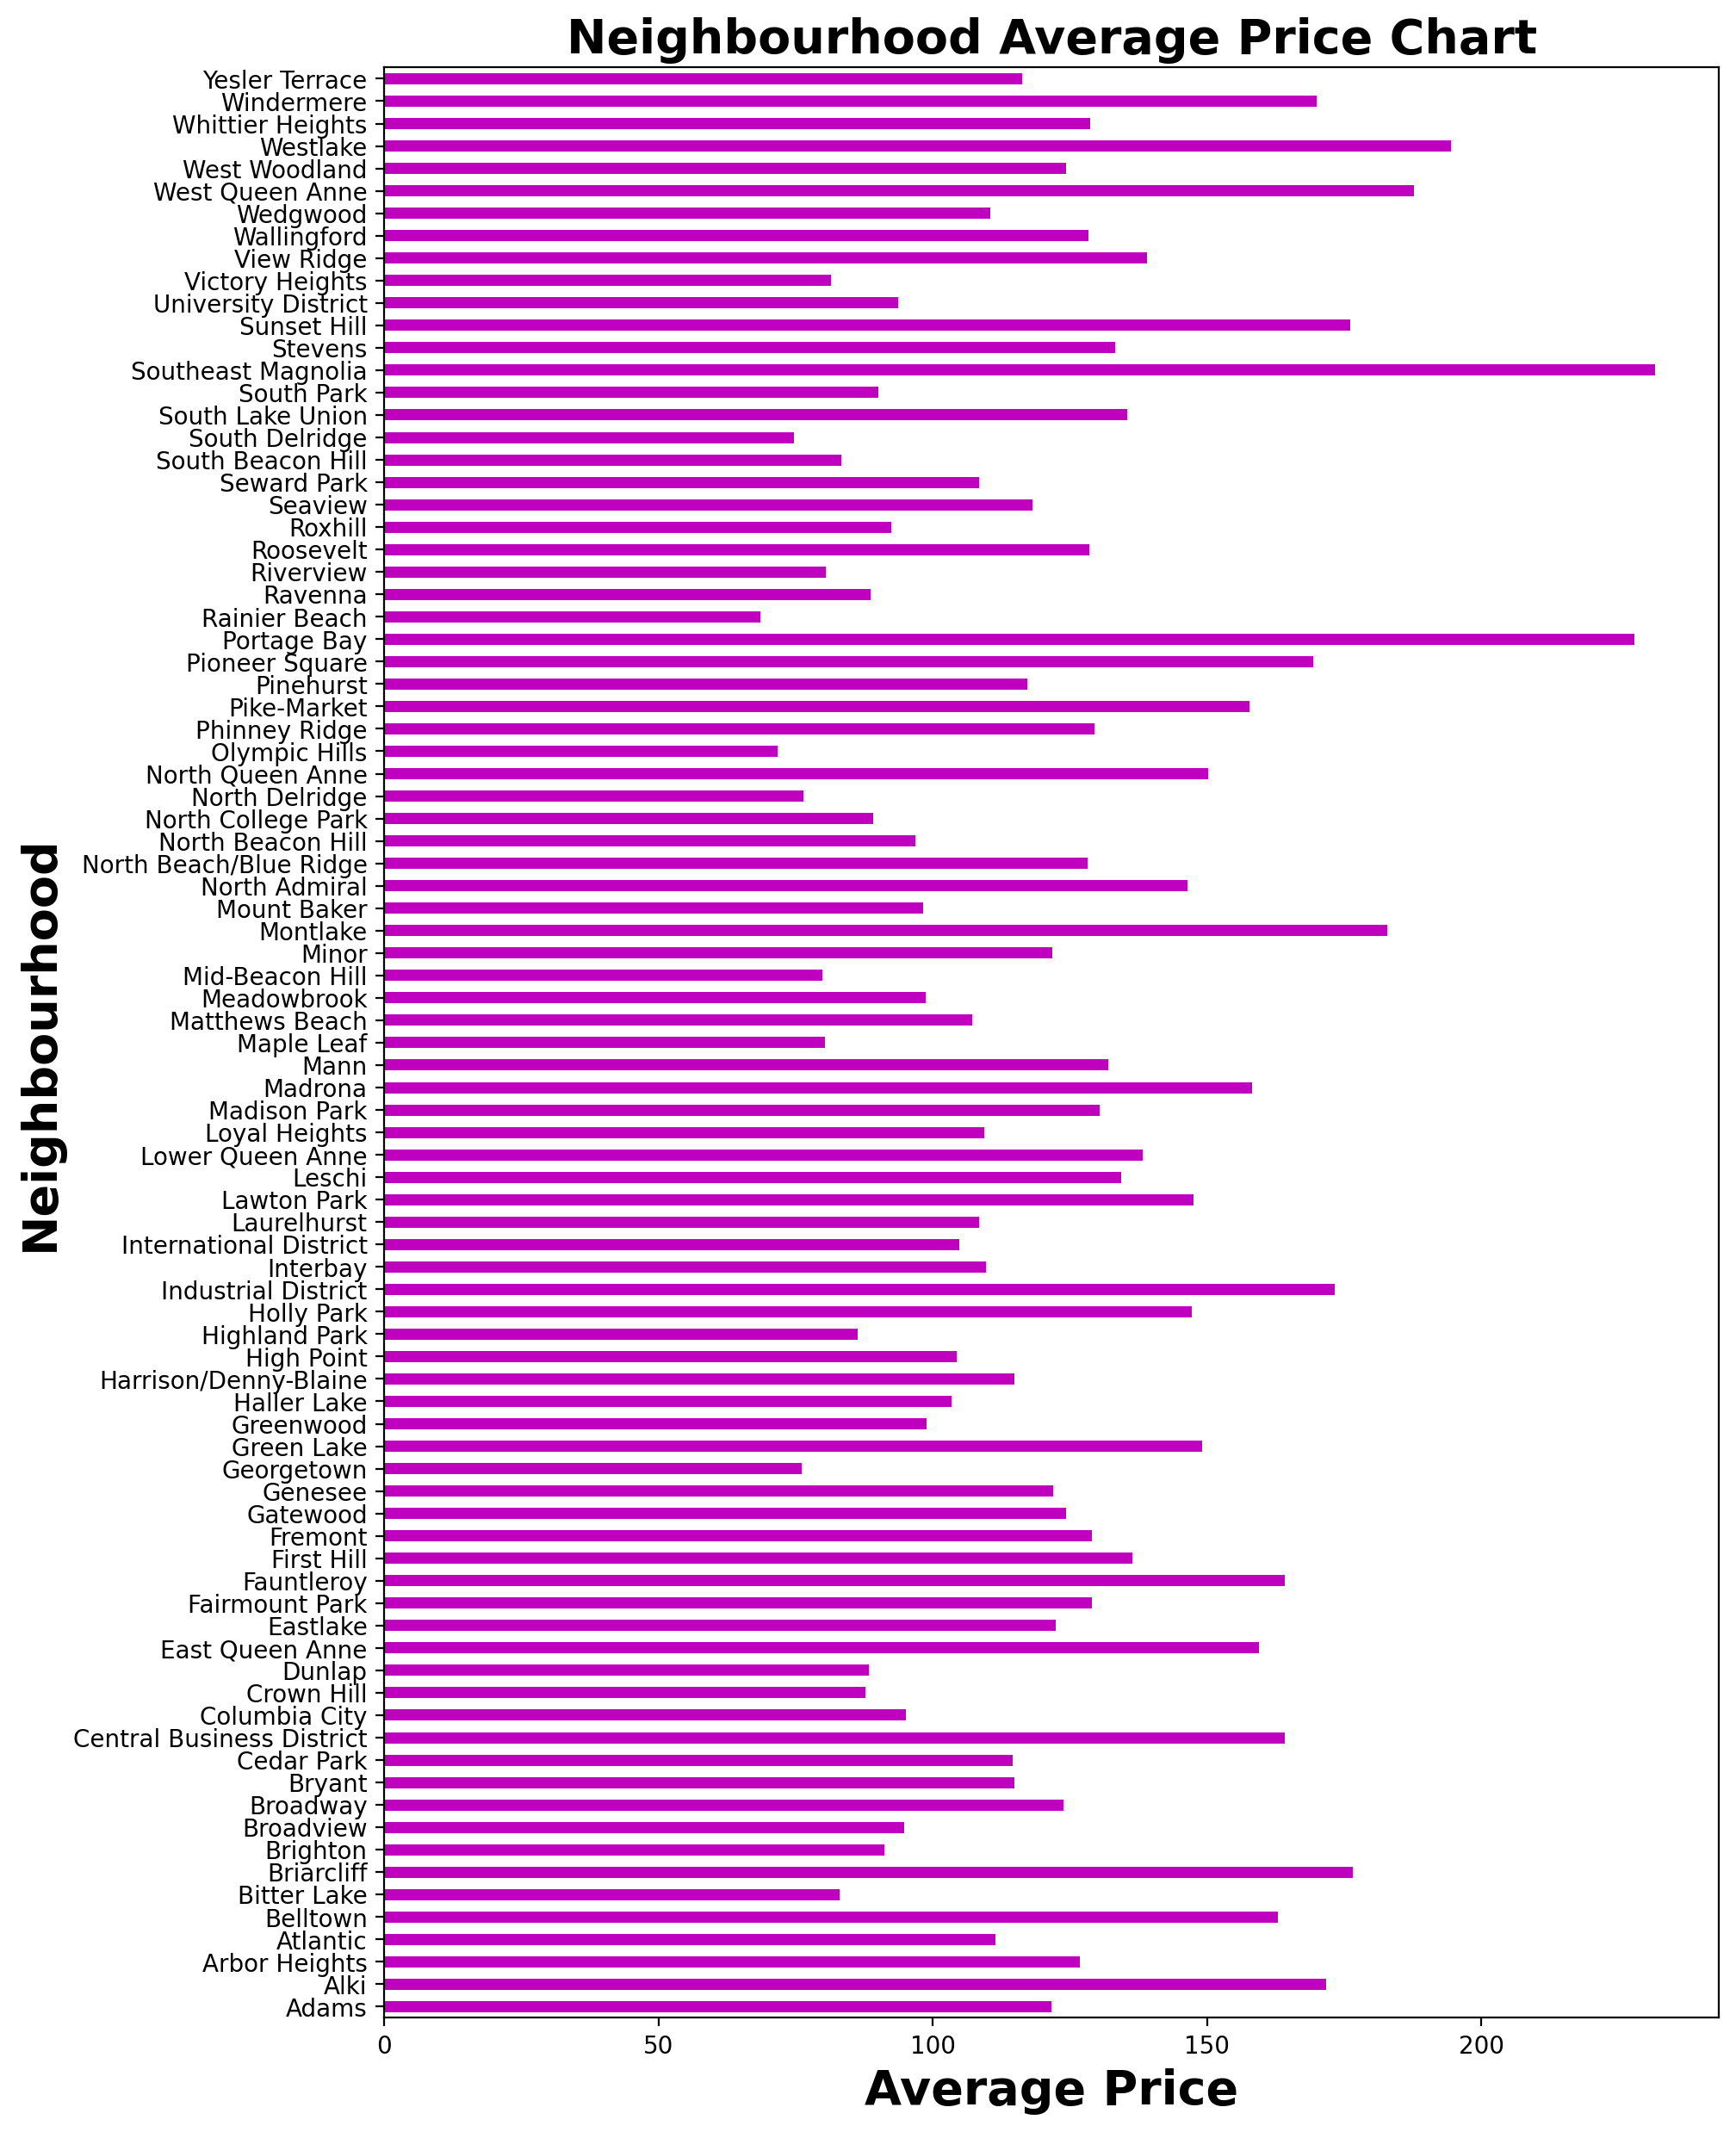

In [47]:
price_per_neighbourhood = listing_df.groupby(['neighbourhood_cleansed']).price.mean()
plt.figure(figsize=(10,15), dpi=200);
price_per_neighbourhood.plot(kind='barh', color='m');
plt.xlabel('Average Price', weight='bold', size =20)
plt.ylabel('Neighbourhood', weight = 'bold', size =20)
plt.title('Neighbourhood Average Price Chart', weight ='bold', size = 20);

as above graph shows southeast magnolia has the highest price amongst other neighbourhoods.